# Investigation of SDSS image of NGC 450
In this notebook I will import the SDSS image of NGC 450 in the g band and investigate some properties of the object.

TODO:
3D visualisation of flux counts. Compare to Gaussian and Sersic profiles for Galfit value of n. Visualise Galfit fits for one vs two Sersic profiles.

In [41]:
from regphot import git_version
print("This notebook was run with regphot version: \n{}".format(git_version()))

This notebook was run with regphot version: 
62b9b19 (Thu Apr 6 19:19:04 2017 +0100) [with local modifications]


In [42]:
#Import relevant modules
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
import numpy as np
import aplpy
from regphot import galfit

Import the whole SDSS frame

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -9.657e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.577e-01 [aplpy.core]


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


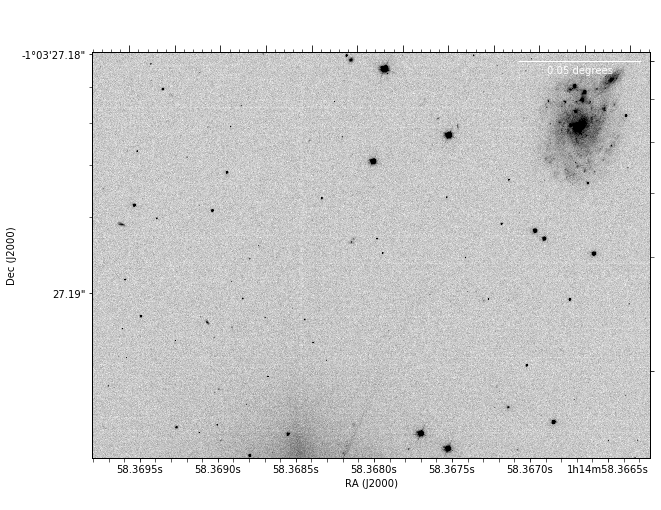

In [43]:
full = fits.open('frame-g-004858-1-0480.fits')
wcs = WCS('frame-g-004858-1-0480.fits')
apfig = aplpy.FITSFigure(full)
apfig.show_grayscale()
apfig.add_scalebar(0.05, "0.05 degrees", color='white', corner='top right')
apfig.set_theme('publication')
apfig.tick_labels.set_xformat('hh:mm:ss.ssss') #ddd.dddddd')
apfig.tick_labels.set_yformat('dd:mm:ss.ss') #ddd.dddddd')
apfig.ticks.show()
#apfig.ticks.set_xspacing(0.05)
apfig.tick_labels.show()
#apfig.add_grid()


## Plot 1D profile across centre of main galaxy

1489


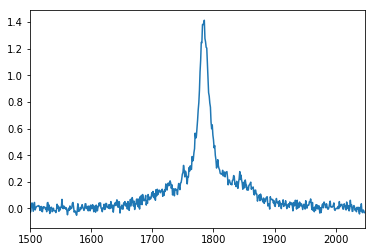

In [54]:
print(len(full[0].data))
y=full[0].data[1210]
x=np.arange(0,len(y),1)
plt.plot(x, y)
plt.xlim([1500,len(y)])
plt.savefig('1dsimple.pdf')



In [45]:
full[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4602733435.14 / 1st row - Number of seconds since Nov 17 1858  
RA      =            19.456261 / 1st row - Right ascension of telescope boresigh
DEC     =            0.000000  / 1st row - Declination of telescope boresight (d
SPA     =              90.000  / 1st row - Camera col position angle wrt north (
IPA     =              69.29

### Extract 1D profile across both galaxies 

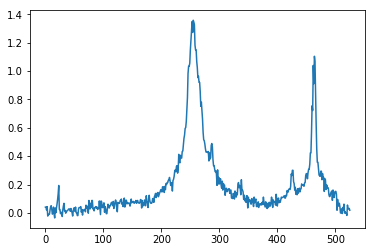

In [55]:
# from http://stackoverflow.com/questions/7878398/how-to-extract-an-arbitrary-line-of-values-from-a-numpy-array
#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 1650, 1000  # These are in _pixel_ coordinates!!
x1, y1 = 1940, 1440 
length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

# Extract the values along the line (why seemingly wrong way round?)
zi = full[0].data[y.astype(np.int), x.astype(np.int)]

#-- Plot...
fig = plt.plot(zi)

#plt.show()
plt.savefig('1dblended.pdf')

Show line used to generate 1D flux graph

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -9.657e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.577e-01 [aplpy.core]


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


INFO: Auto-setting resolution to 264.258 dpi [aplpy.core]


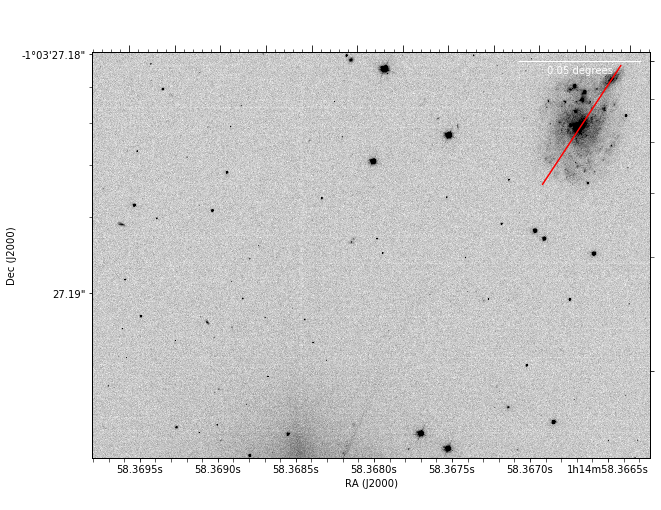

In [56]:
apfig = aplpy.FITSFigure(full)
apfig.show_grayscale()
apfig.add_scalebar(0.05, "0.05 degrees", color='white', corner='top right')
apfig.set_theme('publication')
apfig.tick_labels.set_xformat('hh:mm:ss.ssss') #ddd.dddddd')
apfig.tick_labels.set_yformat('dd:mm:ss.ss') #ddd.dddddd')
apfig.ticks.show()
#apfig.ticks.set_xspacing(0.05)
apfig.tick_labels.show()
#apfig.add_grid()
ra0, dec0 = wcs.all_pix2world(x0, y0, 0) #, 1500 # These are in _pixel_ coordinates!!
ra1, dec1 = wcs.all_pix2world(x1,y1, 0 )#, 2045
iline = np.array([[ra0, ra1],[dec0,dec1]])
apfig.show_lines([iline], color = 'r')
apfig.savefig('lineonmap.pdf')



## Find all 'peak' pixels
For every pixel in the map mark it true if every surrounding pixel is lower in value and false otherwise. This will show us the peak pixels. We can then investigate the positions of these pixels in colour space.
